# Appling Machine Learning Algorithums 

# Import Laibraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Load Dataset

In [2]:
data=pd.read_csv('clean_data.csv')
data

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
11557,Bellandur,1262.0,2.0,47.00,2
11558,Green Glen Layout,1715.0,3.0,112.00,3
11559,Whitefield,3453.0,4.0,231.00,5
11560,other,3600.0,5.0,400.00,4


In [3]:
# drop the location which is catagorical 
data=data.drop('location',axis=1)
data



,total_sqft,bath,price,BHK
0,1056.0,2.0,39.07,2
1,2600.0,5.0,120.00,4
2,1440.0,2.0,62.00,3
3,1521.0,3.0,95.00,3
4,1200.0,2.0,51.00,2
...,...,...,...,...
11557,1262.0,2.0,47.00,2
11558,1715.0,3.0,112.00,3
11559,3453.0,4.0,231.00,5
11560,3600.0,5.0,400.00,4


In [4]:
data.dtypes

total_sqft    float64
bath          float64
price         float64
BHK             int64
dtype: object

# Feature scaling 

In [5]:
#feature scaling of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
fit_data=sc.fit_transform(data)
scaled_data=pd.DataFrame(fit_data,columns=data.columns)
scaled_data


,total_sqft,bath,price,BHK
0,-0.628324,-0.536000,-0.787113,-0.665855
1,2.029702,2.244692,0.385268,1.216217
2,0.032739,-0.536000,-0.454941,0.275181
3,0.172182,0.390897,0.023109,0.275181
4,-0.380425,-0.536000,-0.614291,-0.665855
...,...,...,...,...
11557,-0.273691,-0.536000,-0.672236,-0.665855
11558,0.506157,0.390897,0.269377,0.275181
11559,3.498158,1.317794,1.993253,2.157253
11560,3.751222,2.244692,4.441447,1.216217


## Spliting of Data for traing and testing

In [6]:
# spliting the data
x=scaled_data.drop('price',axis=1)
y=scaled_data['price']
print(f'the shape of x is : {x.shape}')
print(f'the shape of y is : {y.shape}')


the shape of x is : (11562, 3)
the shape of y is : (11562,)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
print(f'the shape of x_train is : {x_train.shape}')
print(f'the shape of y_train is : {y_train.shape}')
print(f'the shape of x_test is : {x_test.shape}')
print(f'the shape of y_test is : {y_test.shape}')

the shape of x_train is : (9249, 3)
the shape of y_train is : (9249,)
the shape of x_test is : (2313, 3)
the shape of y_test is : (2313,)


## Fit Data to the model

## Linear Regression

In [9]:
# data fiting to the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
lr.coef_

array([0.54545707, 0.23521761, 0.07035814])

In [11]:
lr.intercept_

0.0037016341387567323

In [12]:
y_test

2125    -0.407716
10428    0.515645
7138    -0.784506
4041    -0.310078
9560     4.079288
           ...   
1882    -0.339050
7757    -0.860559
10221   -0.686723
4416    -0.961964
10215   -0.483914
Name: price, Length: 2313, dtype: float64

In [13]:
y_pred=lr.predict(x_test)
y_pred

array([-0.32508332,  1.02888619, -0.3861193 , ..., -0.4612405 ,
       -1.24315058, -0.37672915])

In [14]:
y_pred=pd.DataFrame(y_pred,index=y_test.index)
y_pred

,0
2125,-0.325083
10428,1.028886
7138,-0.386119
4041,-0.273437
9560,1.222124
...,...
1882,-1.172246
7757,-0.564532
10221,-0.461240
4416,-1.243151


In [15]:
y_pred = lr.predict(x_test)
result=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
2125,-0.407716,-0.325083
10428,0.515645,1.028886
7138,-0.784506,-0.386119
4041,-0.310078,-0.273437
9560,4.079288,1.222124
...,...,...
1882,-0.339050,-1.172246
7757,-0.860559,-0.564532
10221,-0.686723,-0.461240
4416,-0.961964,-1.243151


In [16]:
# result=pd.concat([y_test,predicted_values_df],axis=1)
# result.rename(columns={'price':'actual_price',0:'predicted_price'})

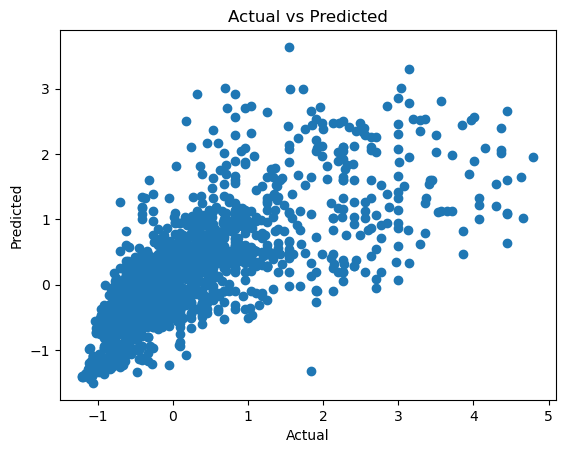

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()  

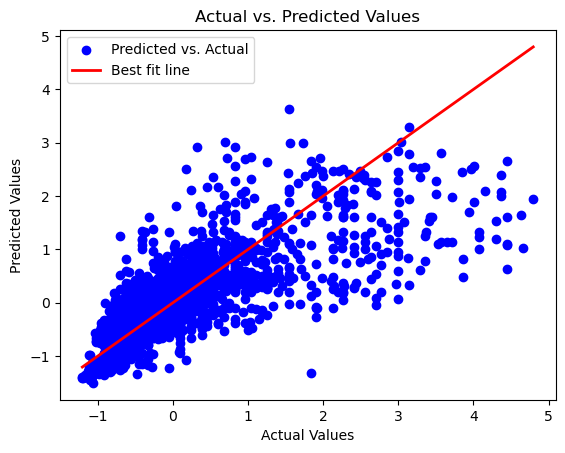

In [18]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')

# Plot the best fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Best fit line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

# To find Error in the model prediction

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
# RMSE=MSE ** (1/2)
R2=r2_score(y_test,y_pred)
# Display the metrics on sqrt 
# .2f is used to print only  two decimal after the point
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"R-squared (R²): {R2:.2f}")

Mean Absolute Error (MAE): 0.43
Mean Squared Error (MSE): 0.42
Root Mean Squared Error (RMSE): 0.64
R-squared (R²): 0.57


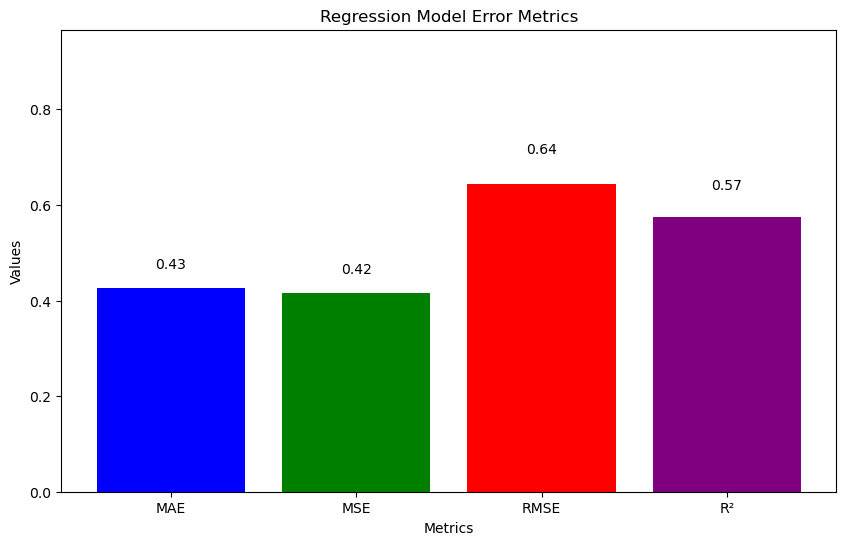

In [20]:
# Prepare data for plotting
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [MAE, MSE, RMSE, R2]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

# Add text annotations
for i in range(len(metrics)):
    plt.text(i, values[i] + (0.1 * values[i]), f"{values[i]:.2f}", ha='center')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')

plt.title('Regression Model Error Metrics')
plt.ylim(0, max(values) + 0.5 * max(values))

# Show the plot
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2313, 9249]